 <h2 style="text-align: center;">Cryptocurrency Market Data Analytics</h2>

**Selección de criptomonedas para su estudio:** Para realizar el presente análsiis se eligieron 10 cryptomonedas relevantes según dos criterios, su capitalización de mercado y su importancia o buenos retorno producidos en este año 2023 ([ver referencia](https://finbold.com/top-10-crypto-assets-by-returns-in-2023/)), por un lado tenemos criptomonedas ya establecidas que constituyen un proyecto con asociados y una comunidad destrás como lo son Bitcoin, Ethereum, Cardano (ADA), Solana e incluso The Graph, y por otro lado otras criptomonedas impulsadas por la comunidad con un precio influenciado más por las redes sociales y comunidades en línea generando crecimientos exponenciales y grandes expectativas cacerca de este tipo de tokens como lo son Dogecoin, Shiba Inu, y la criptomoneda que ha tenido más éxito en el presente año PEPE.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ast import literal_eval
BTC = pd.read_json("BTC.json")
ETH = pd.read_json("ETH.json")
BCH = pd.read_json("BCH.json")
DOGE = pd.read_json("DOGE.json")
ADA = pd.read_json("ADA.json")
SOL = pd.read_json("SOL.json")
SHIB = pd.read_json("SHIB.json")
LDO = pd.read_json("LDO.json")
GRT = pd.read_json("GRT.json")
PEPE = pd.read_json("PEPE.json")

**Temporalidad:** Se ha elegido realizar análisis del precio diario con el fin de realizar el análisis para una posible inversión de mediano a largo plazo. Previo a cualquier inversión es importante conocer los riesgos que conllevan, por lo que se brinda el enlace de la delacración conjunta de los miembros de la FED acerca de los [riesgos de los criptoactivos para organizaciones bancarias](https://www.federalreserve.gov/newsevents/pressreleases/files/bcreg20230103a1.pdf), sin embargo estas advertencias pueden aplicar para cualquier iversor.


In [32]:
'''Se realiza función de transformación de los datos de la API para ser tratados como series de tiempo'''
def t_API_coingecko(dataframe):
    dataframe[["date","prices"]] = (dataframe.prices.apply(pd.Series))
    dataframe["market_caps"] = (dataframe.market_caps.apply(pd.Series)[1])
    dataframe["total_volumes"] = (dataframe.total_volumes.apply(pd.Series)[1])
    dataframe["date"] = pd.to_datetime(dataframe["date"], unit='ms')
    dataframe["date"] = dataframe["date"].dt.strftime("%Y-%m-%d")
    dataframe["date"] = pd.to_datetime(dataframe["date"])
    dataframe["year"] = dataframe["date"].dt.year
    dataframe = dataframe.fillna("0")
    #Calculamos la variación porcentual diaria. Porcentaje negativo significa disminución.
    dataframe["v_porcentual_d"] = dataframe["prices"].pct_change() * 100
    dataframe.loc[0, "v_porcentual_d"] = 0
    dataframe = dataframe[["date","year" ,"prices", "market_caps", "total_volumes","v_porcentual_d"]]
    return dataframe
    

In [33]:
'''Se procesan los 10 dataframes por medio de un ciclo for dejando una lista da datafarmes
en la variable "df_procesados'''
lista_cryptos = [BTC, ETH, BCH, DOGE,ADA, SOL, SHIB, LDO, GRT, PEPE]
df_procesados = []
for df in lista_cryptos:
    df_convertido = t_API_coingecko(df)
    df_procesados.append(df_convertido)

In [34]:
#df[df["symbol"].str.contains("pepe")]

 <h3 style="text-align: center;">EXPLORATORY DATA ANALYISIS</h3>

In [35]:
BTC = df_procesados[0]
ETH = df_procesados[1]
BCH = df_procesados[2]
DOGE = df_procesados[3]
ADA = df_procesados[4]
SOL = df_procesados[5]
SHIB = df_procesados[6]
LDO = df_procesados[7]
GRT = df_procesados[8]
PEPE = df_procesados[9]

### Valores Nulos, faltantes o duplicados

In [36]:
#Generamos un dataframe con valores V/F donde V es un valor duplicado
#La lista de dataframes df_procesados tiene en cada espacio un dataframe de serie de tiempo de criptomonedas
duplicados = pd.DataFrame()
for idx, i in enumerate(df_procesados):
    p=df_procesados[idx].duplicated()
    duplicados[idx] = p
Cuenta_duplicados = duplicados.fillna(False).sum()
Cuenta_duplicados

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [37]:
lst = ["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]
nulos_o_cero_df = pd.DataFrame(columns = ["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"])

for idx, i in enumerate(df_procesados):
    nulos_o_cero = df_procesados[idx].isnull().sum() + (df_procesados[idx] == 0).sum()
    nulos_o_cero_df[(lst[idx])] = nulos_o_cero
    nulos_o_cero_df.loc["#Registros", lst[idx]] = df_procesados[idx].shape[0]
nulos_o_cero_df
#nulos_o_cero.plot(kind="bar", color="red")
#plt.rcParams.update({"font.size" : 4})
#plt.title("Cantidad de Valores Nulos o en Cero por Columna")
#plt.xlabel("Columnas")
#plt.ylabel("Cantidad")
#plt.show()

,BTC,ETH,BCH,DOGE,ADA,SOL,SHIB,LDO,GRT,PEPE
date,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
year,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
market_caps,0.0,1.0,0.0,0.0,0.0,0.0,274.0,0.0,0.0,2.0
total_volumes,242.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
v_porcentual_d,1.0,1.0,2.0,1.0,23.0,2.0,26.0,2.0,13.0,2.0
#Registros,3763.0,2933.0,2214.0,3531.0,2131.0,1225.0,1098.0,956.0,975.0,123.0


Se evidenció en el código anterior el informe con los valores, nulos, en cero o duplicados. En base a la anterior información brindada en los datos de salida se concluye que los datos están aptos para ser analizados con las siguientes salvedades:

+ No es común pero es probable que el precio de cierre sea el mismo en un día determinado con respecto al día anterior, lo que nos puede brindar una variación porcentual diaria de 0.
+ En las primeras etapas de Bitcoin 12 años atrás no había información de volumen diario.
+ Asimismo Shiba Inu en sus primeras fases de desarollo (la criptomoneda apareció en agosto del año 2020) no estaba disponible en los exchanges y el volumen era muy bajo por lo que es esperado que los primeros 274 días no exista un valor de capitalización de mercado.

In [38]:
#Revisamos fechas para observar fechas de análisis de cada una de las 10 cryptomonedas elegidas
data = {"Fechas": ["min", "max"]}
columnas = ["BTC", "ETH", "BCH", "DOGE", "ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]
fechasdf = pd.DataFrame(columns=["Fechas"] + columnas)
for idx, i in enumerate(df_procesados):
    minimo = i["date"].min()
    maximo = i["date"].max()
    fechasdf.loc[0, columnas[idx]] = minimo

min_ = fechasdf.iloc[0].to_numpy().tolist()
min_.pop(0)

nan

Respecto a los outliers, no se elimina ningún registro de las seires temporales, el principal motivo es que el mercado de las criptomonedas está caracterizado por tener variaciones de precio súbitas donde perfectamente en un día puede haber aumentos del 100% o más, por lo que si empleamos un método estadístico va a haber muchos valores que se alejen de la media y mediana e incluso ocupen una zona de baja frecuencia en un histograma de precios históticos.

Sin embargo son rupturas normales que ocurren, y son documentadas tanto en las estadísticas de los exchanges como en los medios especializados de criptomonedas donde reportan dichos movimientos, como por ejemplo [esta noticia](https://decrypt.co/es/138483/pepe-coin-llega-al-top-100-de-criptomonedas-tras-subir-111-en-24-horas) del 24 de mayo del 2023 que anuncia la subida de un 111% de PEPE.

 <h3 style="text-align: center;">ANALIZANDO LOS DATOS</h3>

##### Fecha Inicial de Datos por criptomoneda

Primero vamos a observar en el gráfico de Fechas de inicio de series de tiempo, de acuerdo a la información disponible en la [API de Coingecko](https://www.coingecko.com/en/api/documentation) se observan que el inicio de los datos varía desde el año 2013 para BTC y DOGE hasta el presente año para PEPE, es importante tener en cuenta esto para los análisis posteriores. La fecha a la que va esta análisis depende de los json brindados en la función de transofmación inicial.

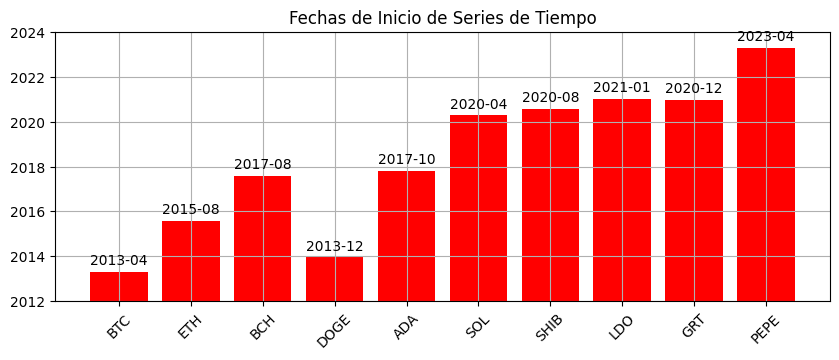

In [39]:
'Grafico de fechas de inicio de series de tiempo'
plt.figure(figsize=(10, 3.5))
plt.grid(True)
plt.title('Fechas de Inicio de Series de Tiempo')

hbars = plt.bar(lst, min_, color="red")

# Configurar el límite en el eje y
plt.ylim(pd.Timestamp('2012-01-01'), pd.Timestamp('2024-01-01'))

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar las fechas sobre cada barra
for bar, date in zip(hbars, min_):
    date_label = date.strftime('%Y-%m')  # Formato deseado
    plt.annotate(date_label,
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # Desplazamiento vertical de la etiqueta
                 textcoords='offset points',
                 ha='center', va='bottom')

In [40]:
#Se genera un único dataframe de serie de tiempo por la 10 monedas, la columna se llamará como la cryptomoneda.
cp = []
for idx, i in enumerate(df_procesados):
    df_precio = df_procesados[idx].rename(columns={"prices": lst[idx] }).drop(columns = ["market_caps","total_volumes","v_porcentual_d","year"])
    cp.append(df_precio)

st_precios = cp[0]
for idx in range(1, len(cp)):
    st_precios = pd.merge(st_precios, cp[idx], on="date", how = "outer")
st_precios["date"] = pd.to_datetime(st_precios["date"])

##### Correlación entre criptomonedas en estudio

Abajo encontramos la matriz de correlación de las 10 criptomonedas en estudio, el punto de comparación siempre va a ser Bitcoin ya que es la criptomoneda más popular, con mayor capitalización en el mercado y es la pripmera criptomoneda. Dicho lo anterior podemos observar en la matriz de correlación en la imágen abajo que la gran mayoría de los casos tenemos un coeficiente de correlación positiva, entre más cerca a 1 indica que ante un alza ambas van a subir, es decir vamos a tener una relación directa, por ejemplo miremos la correlación de BTC con ETH, DOGE y ADA que es más del 85% lo cual inidca que hay una tendencia de estas 3 monedas a seguir el precio del Bitcoin sea tendencia alcista o bajista.

Para interpretar qué tan fuerte es la correlación podemos utilizar el criterio de Cohen (1988), quien para valores absolutos indica que valores entre:

    0.1 - 0.3 representan un efecto pequeño,
    0.3 - 0.5 un efecto medio y
    mayor que 0.5 un efecto grande.

Text(0.5, 1.0, 'Natriz de correlación entre criptomonedas')

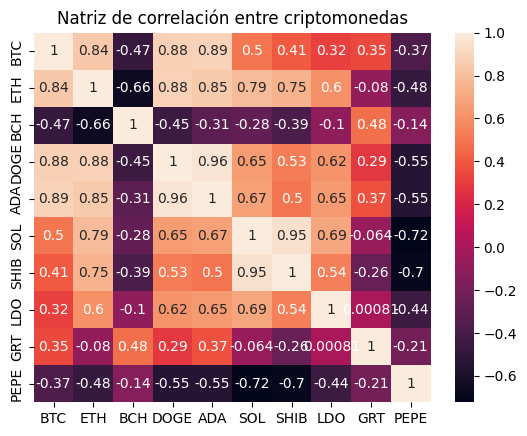

In [41]:

corr_st_precios = st_precios[["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]].corr()
dataplot = sns.heatmap(corr_st_precios.corr(), annot=True)
plt.title("Natriz de correlación entre criptomonedas")

##### Relación entre variables

En las siguentes gráficas observamos la relación existente entre el volumen y la variación porcentual en temporalidad diaria, observamos como por lo general en los años de los primeros registros cuando aún la capitalización de mercado no es muy alta, volúmenes bajos podían mover fácilemten el precio en aumento o en decrecimiento del mismo, los colores obscuros que representan los primeros años de la serie de tiempo se tienen a concentrar en la parte izquierda de la gráfica. Adicional a ello en todos los gráficos se observa cierta simetría en los gráficos, quiere decir que el analizar un aumento o una tendencia a disminuir del volúmen por sí solo no nos va a indicar si el precio baja o sube, pero la magnitud del volúmen si nos da indicativo de que tan probable es que el movimiento del precio sea representativo o no.

Respecto al bitcoin y las demás criptomonedas correlacionadas (ADA,ETH, DOGE y SOL) se observa un comportamiento muy similar donde en los dos últimos años recientes hay un rango de tolerancia al aumento de volumen, es decir se ve una alta concentración de puntos amarillos y verde amarillos en las zonas de volúmen medio manteniendo una variación de precio no mayor al 3%, en el gráfico de bitcoin se marca esta zona entre dos líneas verticales rojas, en las demás criptomonedas similares también se observa en algunos casos con mayor dispersión y menos resistencia a la variación del volúmen. En los años recientes se ve un aumento significativo de los volúmenes, y a medida que aumenta el volúmen aumenta la dispersión. La gráfica de LDO presenta la misma relación de estas dos variables (volúmen y variación porcentual de precio) que la descrita con bitcoin.

Respecto a la relación volumen y variación porcentual diaria de las criptomonedas que no están tan fuertemente correlacionadas al bitcoin, se ven comportamientos distintos, en el caso de Bitcoin cash, el comportamiento es inverso al descrito con el Bitcoin, es decir en los últimos años ha disminutiso el volúmen y en zonas de bajo volumen hay una dispersión alta sobre los límites de variación porcentual diaria de + o - 9%. Para Shiba Inu el comportamiento es similar a el de BCH pero con una tendencia dispersa elongada paralela al eje X. Siguiendo con la gráfica de GRT es el mismo comportamiento que el descrito en BCH, nótese que GRT es la criptomoneda que más correlación tiene con BCH.

Por último PEPE presenta una pequeña zona de volúmen donde el precio es relativamente estable, arriba o abajo de esta zona de volúmen se puede disparar la variación porcentual del precio.



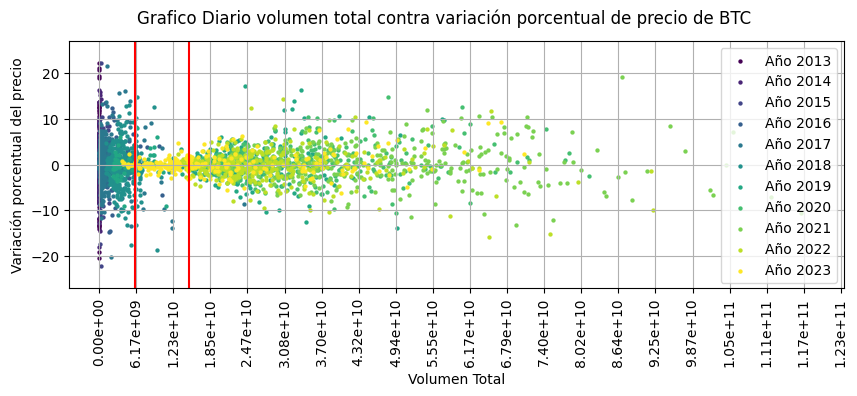

In [42]:
'''Gráfico de relación entre volumen total diario y variación porcentual'''
x = df_procesados[0]["total_volumes"]
y = df_procesados[0]["v_porcentual_d"]
xmax = df_procesados[0]["total_volumes"].max()
year = df_procesados[0]["year"]
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variación porcentual de precio de '+lst[0])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-5000000000, current_xlim[1] -55000000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-27,27)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
plt.axvline(x=6000000000, ymin=0, ymax=1, color = "red")
plt.axvline(x=15000000000, ymin=0, ymax=1, color = "red")
ax.legend()

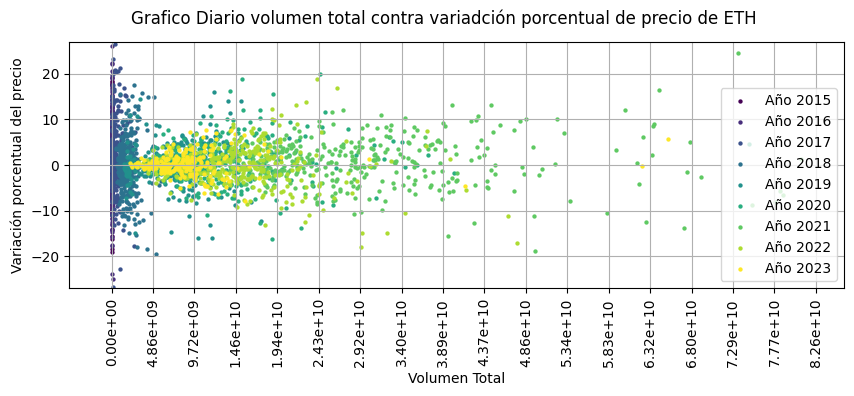

In [43]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[1]["total_volumes"]
y = df_procesados[1]["v_porcentual_d"]
xmax = df_procesados[1]["total_volumes"].max()
year = df_procesados[1]["year"]
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[1])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-5000000000, current_xlim[1] -55000000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-27,27)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

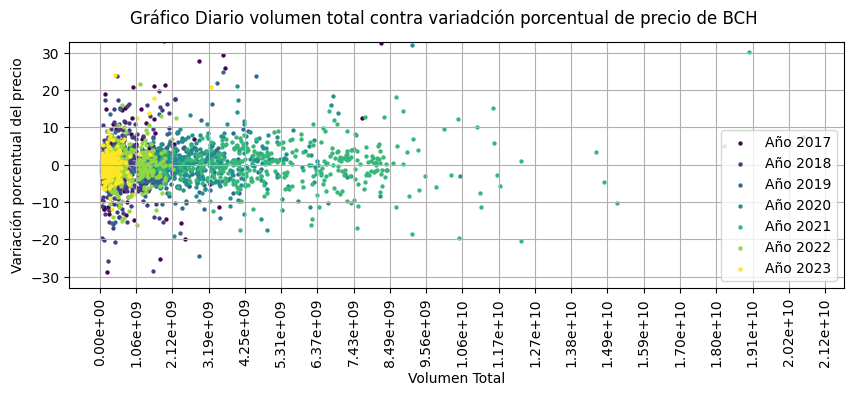

In [44]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[2]["total_volumes"]
y = df_procesados[2]["v_porcentual_d"]
xmax = df_procesados[2]["total_volumes"].max()
year = df_procesados[2]["year"]
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Gráfico Diario volumen total contra variadción porcentual de precio de '+lst[2])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-900000000, current_xlim[1]-9000000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-33,33)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

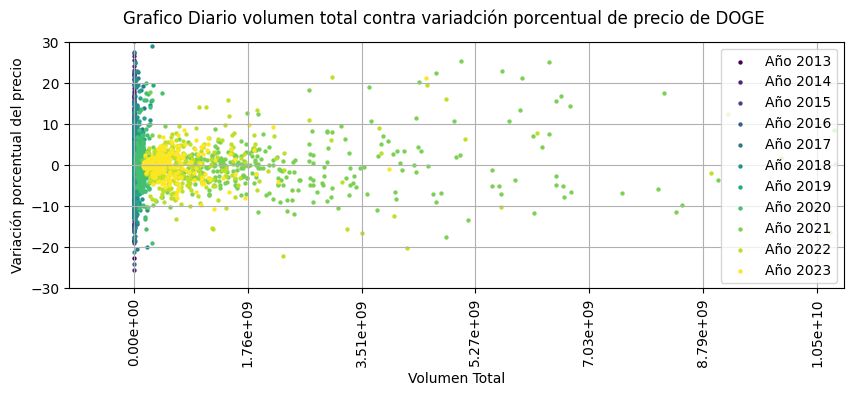

In [45]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[3]["total_volumes"]
y = df_procesados[3]["v_porcentual_d"]
year = df_procesados[3]["year"]
xmax = df_procesados[3]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[3])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-1000000000, current_xlim[1]-40000000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

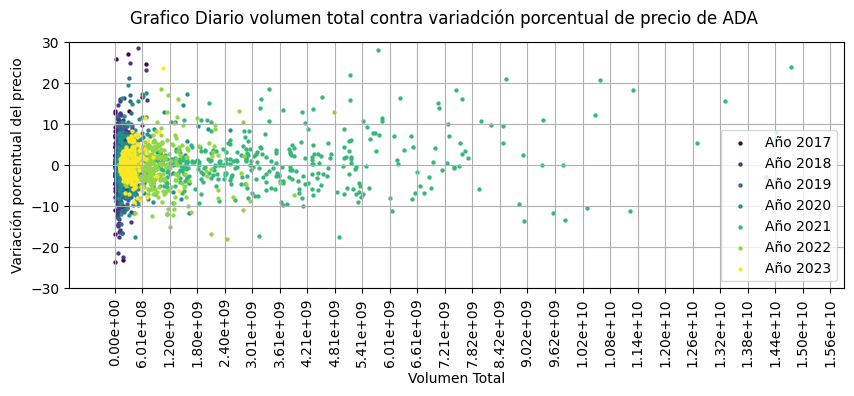

In [46]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[4]["total_volumes"]
y = df_procesados[4]["v_porcentual_d"]
year = df_procesados[4]["year"]
xmax = df_procesados[4]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[4])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-1000000000, current_xlim[1]-1500000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

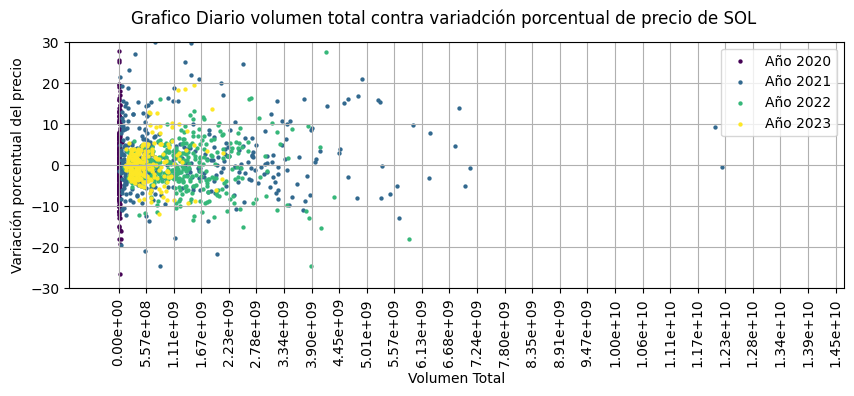

In [47]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[5]["total_volumes"]
y = df_procesados[5]["v_porcentual_d"]
year = df_procesados[5]["year"]
xmax = df_procesados[5]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[5])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-1000000000, current_xlim[1]-1500000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

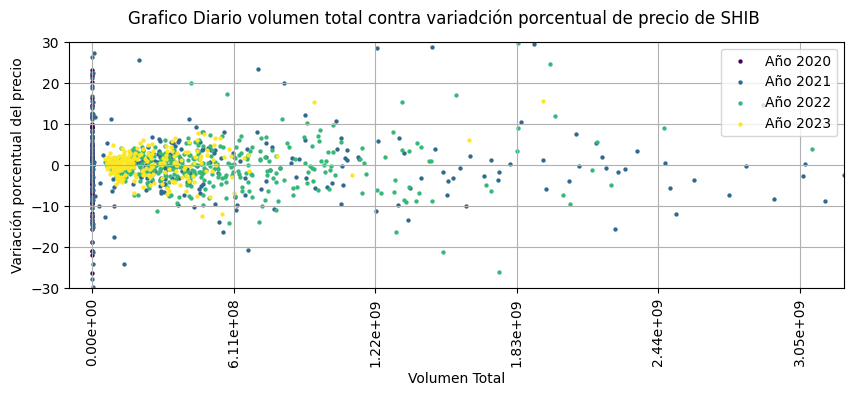

In [48]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[6]["total_volumes"]
y = df_procesados[6]["v_porcentual_d"]
xmax = df_procesados[6]["total_volumes"].max()
year = df_procesados[6]["year"]
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[6])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 60) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-100000000, current_xlim[1]-32800000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

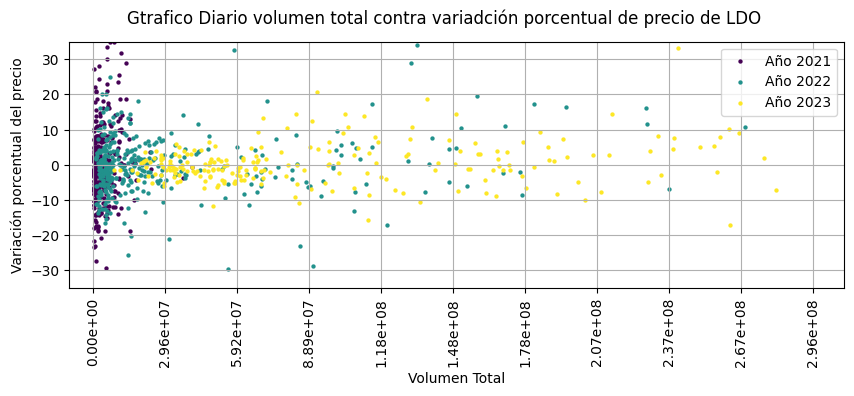

In [49]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[7]["total_volumes"]
y = df_procesados[7]["v_porcentual_d"]
year = df_procesados[7]["year"]
xmax = df_procesados[7]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3.2))
fig.suptitle('Gtrafico Diario volumen total contra variadción porcentual de precio de '+lst[7])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-10000000, current_xlim[1]-550000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-35,35)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

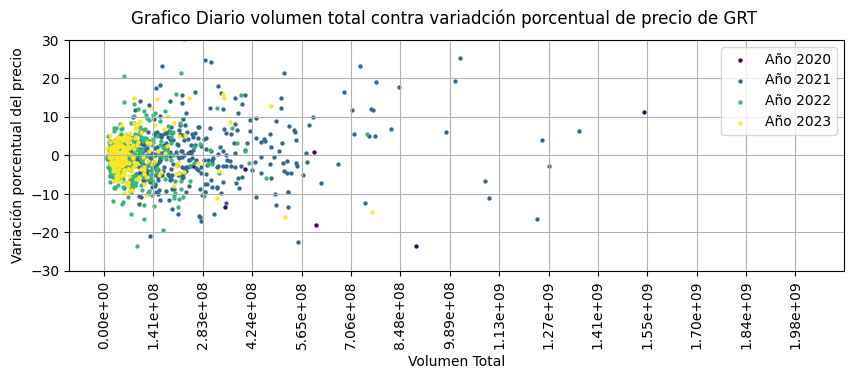

In [50]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[8]["total_volumes"]
y = df_procesados[8]["v_porcentual_d"]
year = df_procesados[8]["year"]
xmax = df_procesados[8]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[8])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-100000000, current_xlim[1]-1980000000)
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

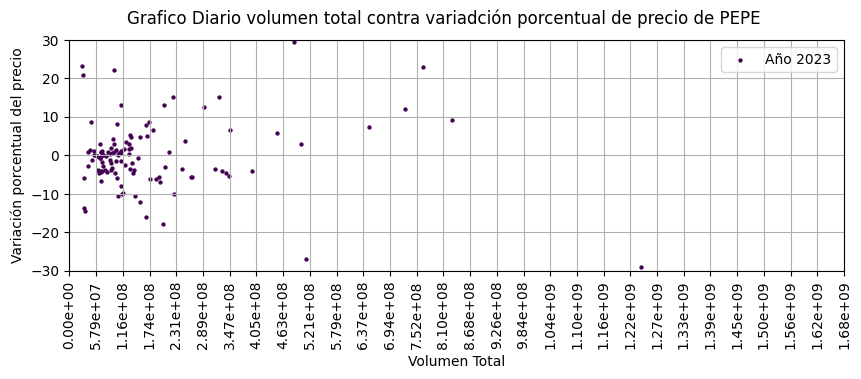

In [51]:
'''Grafico de relación entre volumen total diario y vatriación porcentual'''
x = df_procesados[9]["total_volumes"]
y = df_procesados[9]["v_porcentual_d"]
year = df_procesados[9]["year"]
xmax = df_procesados[9]["total_volumes"].max()
unique_years = np.unique(year)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
fig, ax = plt.subplots(figsize=(10, 3))
fig.suptitle('Grafico Diario volumen total contra variadción porcentual de precio de '+lst[9])
ax.ticklabel_format(axis="x", style="sci", scilimits=(-5, 2), useMathText=True)
x_ticks_values = np.linspace(0, xmax, 30) 
x_ticks_labels = ["{:.2e}".format(value) for value in x_ticks_values]
plt.xticks(x_ticks_values, x_ticks_labels, rotation=90)
current_xlim = ax.get_xlim()
new_xlim = (current_xlim[0]-1000000, current_xlim[1])
ax.set_xlim(new_xlim)
ax.set_ylim(-30,30)
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=4.5, label=f'Año {int(y_val)}')
ax.grid(True)
ax.set_xlabel("Volumen Total")
ax.set_ylabel("Variación porcentual del precio")
ax.legend()

##### Hitogramas de variación porcentual diaria

En la función de transformación "t_API_coingecko" se calculó la variación porcentual diaria, un valor porcentual negativo significa disminución del precio con respecto al día anterior, valor positivo aumento. Para dar perspectiva de los datos de variación porcentual diaria de las cryptos en comparación con la bolsa "tradcional" tomando la acción de [Amazon](https://es.investing.com/equities/amazon-com-inc-historical-data) en cuanto a variación porcentual diaría en el último mes su variación porcentual diaria no llega ni al 2.0%, en el caso de una acción de una empresa relevante en la bosla de valores de Colombia como [Bancolombia](https://es.investing.com/equities/bcolombia-historical-data) su variación diaria porcentual en los últimos 30 días sube al 3.45% pero en promedio la variación es del 1.3% en creicmiento o decrecimiento.

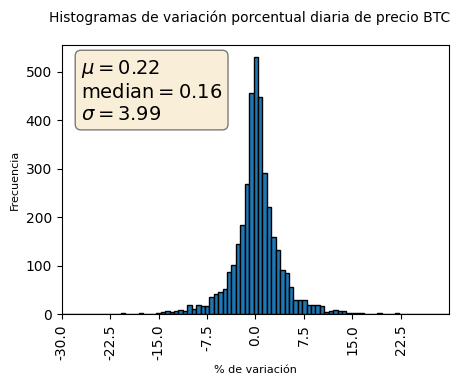

In [52]:
'''Histogramas de variación porcentual diaria de precio'''
n_bins = 100
x_ticks_values = np.arange(-30, 30, 7.5)
x_ticks_labels = [str(value) for value in x_ticks_values]

fig, ax = plt.subplots(figsize =[5,3.5])
plt.xlim(-30,30)
fig.suptitle('Histogramas de variación porcentual diaria de precio BTC', fontsize = 10)
mu = df_procesados[0]["v_porcentual_d"].mean()
median = np.median(df_procesados[0]["v_porcentual_d"])
sigma = df_procesados[0]["v_porcentual_d"].std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel('% de variación', fontsize = "8")
ax.set_ylabel('Frecuencia', fontsize = "8")
plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
plt.hist(df_procesados[0]["v_porcentual_d"], n_bins, edgecolor ="black")
plt.show()

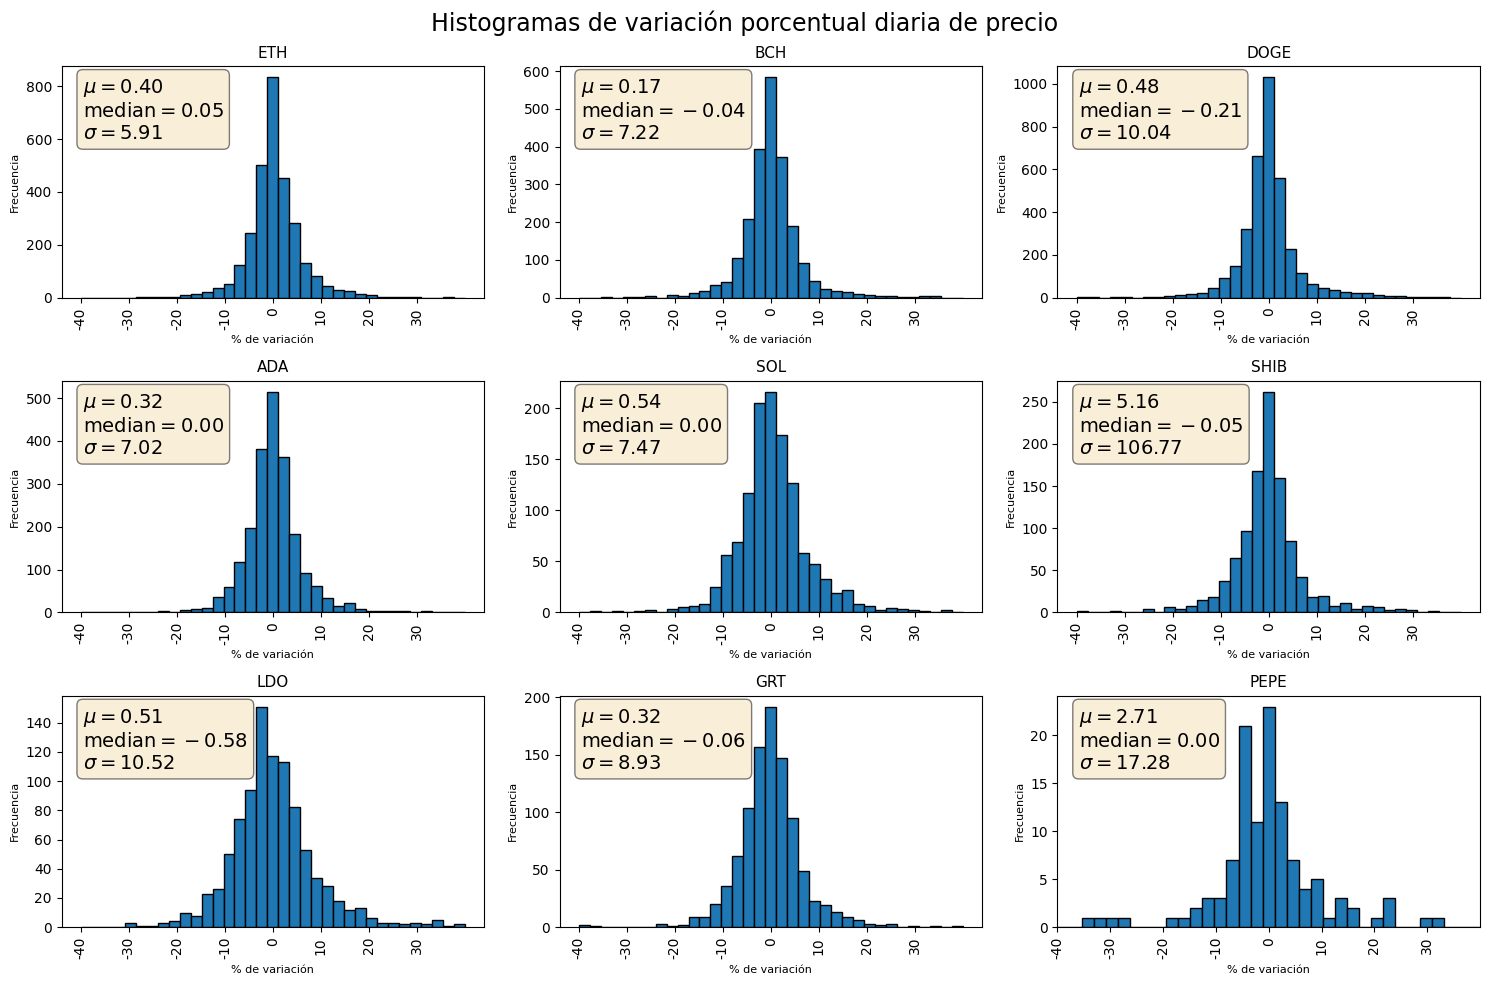

In [53]:
'''Histogramas de variación porcentual diaria de precio'''
n_bins = 35
x_range = (-40,40)
fig, ((axs0, axs1, axs2), (axs3, axs4, axs5), (axs6, axs7, axs8)) = plt.subplots(3, 3, figsize=(15,10), tight_layout=True)
dataframes = [df_procesados[1], df_procesados[2], df_procesados[3],
              df_procesados[4], df_procesados[5], df_procesados[6],
              df_procesados[7], df_procesados[8], df_procesados[9]]

x_ticks_values = np.arange(-40, 40, 10)
plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
fig.suptitle('Histogramas de variación porcentual diaria de precio', fontsize = 17)
x_ticks_labels = [str(value) for value in x_ticks_values]
for i, ax in enumerate([axs0, axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8]):

    mu = df_procesados[i+1]["v_porcentual_d"].mean()
    median = np.median(df_procesados[i+1]["v_porcentual_d"])
    sigma = df_procesados[i+1]["v_porcentual_d"].std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    ax.hist(dataframes[i]["v_porcentual_d"], edgecolor="black", bins=n_bins, range=x_range)
    ax.set_title(lst[i+1], fontsize = 11)
    ax.set_xlabel('% de variación', fontsize = "8")
    ax.set_ylabel('Frecuencia', fontsize = "8")
    ax.set_xticks(x_ticks_values)
    ax.set_xticklabels(x_ticks_labels, rotation=90, fontsize=10)
    plt.xlim(-40,40)
    ax.tick_params(axis='y', labelsize=10)
    plt.xticks(x_ticks_values, x_ticks_labels, rotation = 90)
plt.show()

In [54]:
#Calculo de la media movil 65 periodos previo a exportaci[on, ver aparte de KPIs
for idx, i in enumerate(df_procesados):
    df_procesados[idx]['MM65'] = df_procesados[idx]['prices'].rolling(window=65).mean()
    df_procesados[idx]['MM65'] = df_procesados[idx]['MM65'].fillna(0)

In [55]:
'''Se exportan los dataframes anidados en el orden de la lista "lista_cryptos", es decir 0.csv
pertenece a BTC, estos archivos se incorporaran a la base de datos de SQL'''
df_exportados = []
for idx, df in enumerate(df_procesados):
    csv= f"Cryptos_csv/{idx}.csv"
    df.to_csv(csv, index = False)
    df_exportados.append(csv)

En los histogramas de las variaciones diarias de las diferentes cryptomonedas se observan valores simétricos y unimodales con excepción de PEPE que presenta dos modas, sin embargo hay que considerar que el tamaño de la muestra de PEPE es mucho menor.

Se observa gráficamente una baja dispersión, el gráfico que mas presenta disperción es el de LDO, sin embargo si observamos los gráficos en prácticamente todos los casos tenemos altas frecuencias en el rango de -5% a +5% lo cual para un activo en el que se invierte es una variación diaria bastante alta, sin embargo al observarse una simetría en general podríamos inferir de que la probabilidad de que aumente o disminuya es similar a nivel general.


##### Histogramas de precio

En la mayoría de histogramas se presenta un modelo de cola derecha, en el cual a medida que nos movemos a lo largo del eje x la frecuencia va disminuyendo. Para el caso de las criptomonedas con registros más recientes se tomará desde el año 2017 los registros debido a que en los primeros años las criptomonedas se mantuvieron mucho tiempo en valores bajos.

In [56]:

mascara = df_procesados[0]["year"] > 2016
hist_BTC = df_procesados[0][mascara]
mascara = df_procesados[1]["year"] > 2016
df_procesados[1] = df_procesados[1][mascara]
mascara = df_procesados[3]["year"] > 2016
df_procesados[3] = df_procesados[3][mascara]

Text(0.55, 0.95, '$\\mu=18453.01$\n$\\mathrm{median}=10607.46$\n$\\sigma=16191.96$')

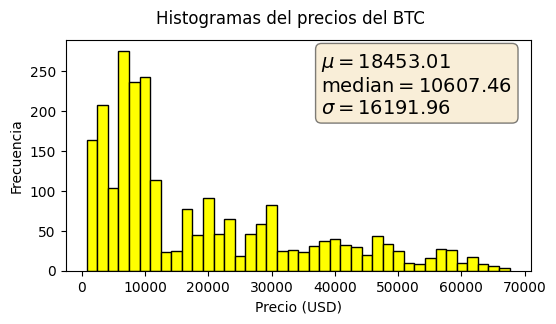

In [57]:
'''Se realiza histograma de precio del BTC desde el año 2013 al 2023'''
fig, ax = plt.subplots(figsize =[6,3])
ax.hist(hist_BTC["prices"], edgecolor="black", color = "yellow", bins = 40)
ax.set_xlabel('Precio (USD)', fontsize = "10")
ax.set_ylabel('Frecuencia', fontsize = "10")
fig.suptitle('Histogramas del precios del BTC', fontsize = 12)

mu = hist_BTC["prices"].mean()
median = np.median(hist_BTC["prices"])
sigma = hist_BTC["prices"].std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)


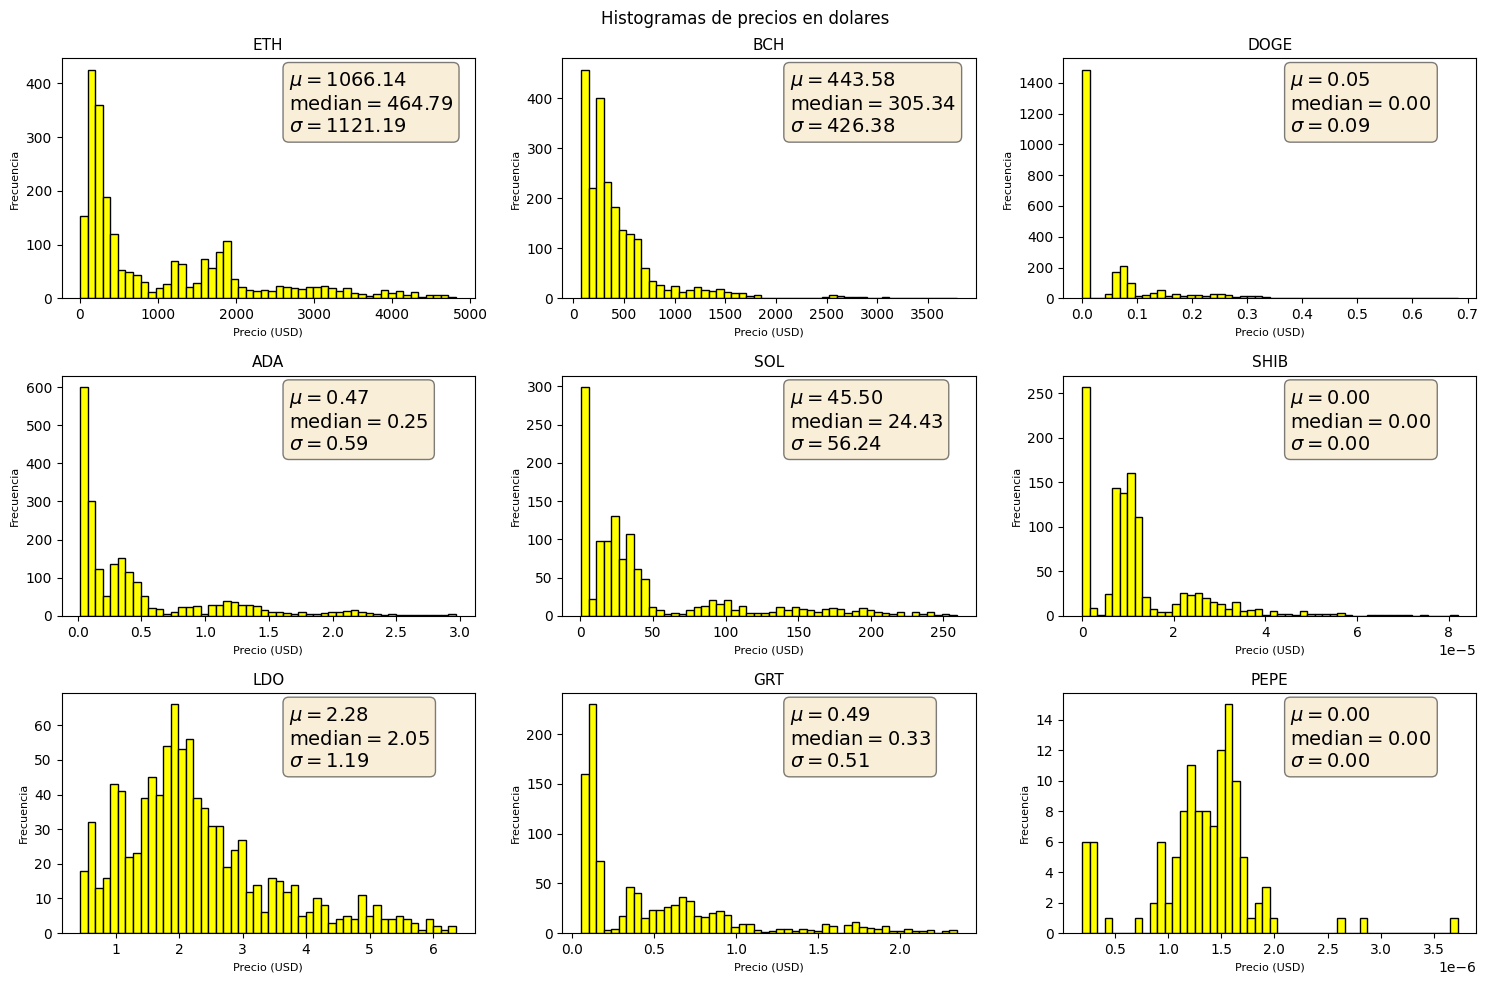

In [58]:
'''Histogramas de precios de criptomonedas'''
fig, ((axs0, axs1, axs2), (axs3, axs4, axs5), (axs6, axs7, axs8)) = plt.subplots(3, 3, figsize=(15,10), tight_layout=True)
dataframes = [df_procesados[1], df_procesados[2], df_procesados[3],
              df_procesados[4], df_procesados[5], df_procesados[6],
              df_procesados[7], df_procesados[8], df_procesados[9]]
for i, ax in enumerate([axs0, axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8]):
    mu = df_procesados[i+1]["prices"].mean()
    median = np.median(df_procesados[i+1]["prices"])
    sigma = df_procesados[i+1]["prices"].std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.hist(dataframes[i]["prices"], edgecolor="black", color = "yellow", bins = 50)
    ax.set_title(lst[i+1], fontsize = 11)
    ax.set_xlabel('Precio (USD)', fontsize = "8")
    ax.set_ylabel('Frecuencia', fontsize = "8")
fig.suptitle('Histogramas de precios en dolares', fontsize = 12)
plt.show()

##### Análisis Capitalización de Mercado

La capitalización de mercado es el valor (mostrado en dólares) de todas las monedas disponibles.
Es decir hay una proporcionalidad directa ya que:

Precio criptomoneda x cantidad disponible = capitalización de mercado

Por ello al graficar el precio contra la capitalización de mercado no dá una línea recta, y al calcular la correlación no dará 1. Abajo se muestra el ejemplo usando a Solana, realizando la gráfica para relacionar las variables y calculando el coeficiente de correlación, sin embargo se puede realizar esto mismo con cualquiera de las otras 9 criptos que se están analizando y el resultado será el mismo.

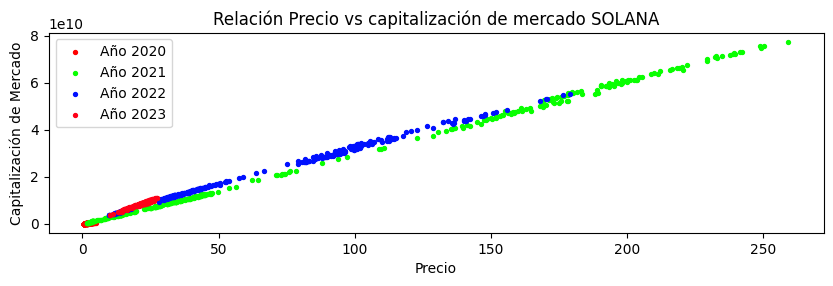

In [59]:
x = df_procesados[5]["prices"]
y = df_procesados[5]["market_caps"]
year = df_procesados[5]["year"]
fig, ax = plt.subplots(figsize=(10, 2.6))
unique_years = np.unique(year)
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_years)))
for i, y_val in enumerate(unique_years):
    mask = year == y_val
    ax.scatter(x[mask], y[mask], c=[colors[i]], s=8, label=f'Año {int(y_val)}')
ax.set_xlabel("Precio")
ax.set_ylabel("Capitalización de Mercado")
ax.set_title("Relación Precio vs capitalización de mercado SOLANA")
ax.legend()


In [60]:
np.corrcoef(x, y)[0,1]

0.9973889859412512

Cabe resaltar que entre menor capitalización de mercado es más fácil que el precio se mueva con una compra o venta significativa, por ejemplo la capitalización de mercado de Bitcoin para el 1/ de agosto del 2023 es de 555 Billones de dólares mientras que la de Pepe a la misma fecha es de menos de los 0.5 Billones de dólares, lo cual un gran inversor puede mover el precio de Pepe pero el de Bitcoin se necesita una cantidad muy grande de dinero para hacerlo.

##### Series de Tiempo

Se grafican las respectivas series de tiempo de cada una de las criptomonedas, se agrupan las que tienen un precio similar.

Text(0, 0.5, 'Precio (USD)')

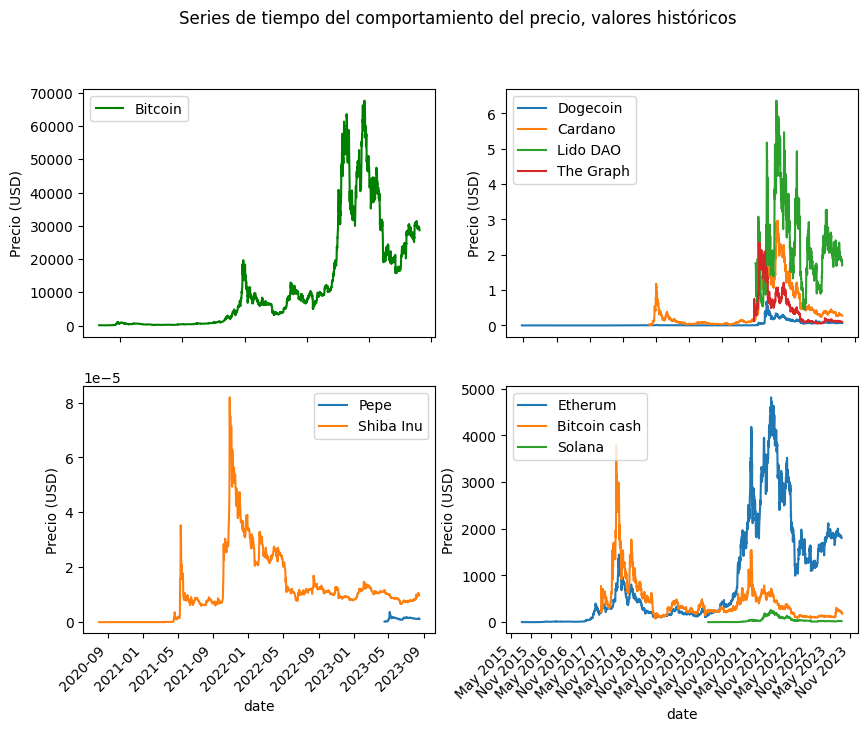

In [61]:
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
fig,ax =  plt.subplots( 2, 2,figsize = ( 10, 8))
sns.lineplot(x = "date", y = "ETH", data = st_precios, label = "Etherum")
sns.lineplot(x = "date", y = "BCH", data = st_precios, label = "Bitcoin cash")
sns.lineplot(x = "date", y = "SOL", data = st_precios, label = "Solana")
plt.ylabel("Precio (USD)")
x_ticks_labels = [str(value) for value in x_ticks_values]
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

ax[0][0].tick_params("x", labelrotation = 45)
sns.lineplot( x = "date", y = "BTC", color = 'g', data = st_precios, ax = ax[0][0], label = "Bitcoin")
ax[0][0].set_ylabel("Precio (USD)")

ax[0][1].tick_params("x",labelrotation = 45)
sns.lineplot( x = "date", y = "DOGE", data = st_precios,ax = ax[0][1], label = "Dogecoin")
sns.lineplot( x = "date", y = "ADA", data = st_precios,ax = ax[0][1], label = "Cardano")
sns.lineplot( x = "date", y = "LDO", data = st_precios,ax = ax[0][1], label = "Lido DAO")
sns.lineplot( x = "date", y = "GRT", data = st_precios,ax = ax[0][1], label = "The Graph")
ax[0][1].set_ylabel("Precio (USD)")
plt.suptitle("Series de tiempo del comportamiento del precio, valores históricos")
ax[1][0].tick_params("x",labelrotation = 45)
sns.lineplot( x = "date", y = "PEPE", data = st_precios,ax = ax[1][0], label = "Pepe")
sns.lineplot( x = "date", y = "SHIB", data = st_precios,ax = ax[1][0], label = "Shiba Inu")
ax[1][0].set_ylabel("Precio (USD)")


 <h3 style="text-align: center;">Key Performance Indicators</h3>

Los KPIs definidos en base al análisis exploratorio de datos van a estar en torno a el segumiento a la desición de inversión y a la inversión como tal en criptomonedas, a continuación se van a describir los 3 KPI propuestos para realizar seguimiento e influir en las desiciones futuras.

Para mostrar, probar y evaluar, se incluye dentro de los archivos el archivo de Inversiones.csv el cual se consignan las inversiones realizadas en cada criptomoneda y por fecha, en este caso se asume que se diversifica en el portafolio.

1. Indicador de rentabilidad de inversiones: Empleando la variación porcentual entre la fecha de inversión y la fecha actual considerando esto en todas y cada una de las inversiones para tener una visión global de cuales inversiones presentan ganacia y cuales tienen inconvenientes para poder mirar mas a fondo si es conveniente proseguir con el dinero y salir y aceptar la pérdida.

2. Indicador de entrada o salida de inversión a mediano plazo: Se emplea la media móvil tomando los ultimos 65 días de registros, una plazo apropiado apra que pueda tomar tendencias a la baja y alcistas.

3. Retorno de Inversión Global ajustado: Para evaluar realmente que tal rentable es una inversión en el tiempo, dado que en este escenario teórico se considera que la compañia que desea explorar sus oportunidades de inversión es Colombiana este KPI se devolverá con el ajuste por tasa de cambio en base a los datos históricos del Banco de la República de Colombia. se brinda el archivo "1.1.1.TCM_Serie histórica IQY"

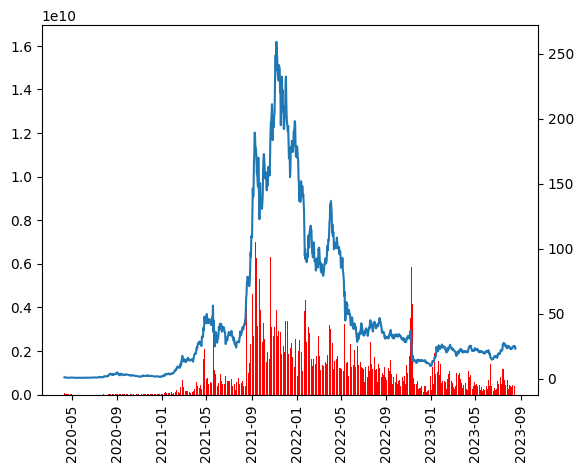

In [62]:

x1=df_procesados[5]["date"]
y1=df_procesados[5]["total_volumes"]
x2=df_procesados[5]["date"]
y2=df_procesados[5]["prices"]
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax.set_xticks([])
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.bar(x1, y1, color = "red")
ax2.plot(x2,y2)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.tick_params("x",labelrotation = 90) 
plt.show()


In [63]:
#Calculo de la media movil
for idx, i in enumerate(df_procesados):
    df_procesados[0]['MM20'] = df_procesados[0]['prices'].rolling(window=65).mean()

##### CONCLUSIONES Y RECOMENDACIONES

+ La deisicón de inversión no debe darse solo por el análisis de datos, detrás hay un contexto respecto a la adopción del mercado, regulaciones, el panorama económico mundial que pueden impactar en el mercado y requieren también de su consideración.
+ Las criptomonedas son activos de alta volatilidad, dicha volatilidad al mirar los histogramas de variación porcentual de precio puede ser alcista o bajista por lo que puede ser una inversión dependiendo de el momento en que se entre al mercado.
+ Muchas criptomonedas siguen la tendencia del bitcoin, al momento de diversificar hay que considerar estas correlaciones entre las diferentes criptomonedas.
+ Los hitogramas de precios y el gráfico de serie de tiempo del precio pueden son de importancia para identificar una correcta entrada al mercado, el histograma nos da una idea de en que rangos determinada criptomoneda suele permanecer más, la serie de tiempo podemos indagar resultados anteriores de tendencia.
+ El seguimiento de la inversión por medio del dashboard y KPI determinan el éxito de una futura inversión, es importante siempre la mejora continua e ir aprendiendo del mercado y los indicados, relaciones y variables que se puedan ir dándole mas peso o incorporando confirme se adquiera conocimiento del mercado de las criptomonedas.
+ Las criptomonedas son consideradas como una inversión de alto riesgo es importante indagar y cuantificar los posibles riesgos para determinar el monto de la inversión.
